# โรคไขมันพอกในตับ

   โรคนี้เป็นอีกหนึ่งโรคที่มักไม่แสดงอาการอะไรออกมาให้เห็น ดังนั้นผู้ป่วยจึงแทบไม่รู้สึกตัวเลยว่าเริ่มเป็นโรคเข้าแล้ว แถมอาการที่เกิดขึ้นได้ก็ไม่เฉพาะเจาะจงพอ เช่น อ่อนเพลีย มึนเวียน คลื่นไส้ หรือรู้สึกตึงๆ บริเวณใต้ชายโครงด้านขวา ซึ่งแม้จะมีอาการขึ้นจริงๆ หลายครั้งก็อาจจะนึกว่าเป็นโรคอื่นไปได้ ผู้ป่วยส่วนใหญ่ที่ตรวจพบว่ามีโรคไขมันพอกตับ จึงมักตรวจเจอโดยบังเอิญจากการตรวจสุขภาพร่างกายประจำปี หรือไปพบแพทย์ด้วยโรคอื่นๆ เป็นต้น

   หนึ่งในวิธีการตรวจสุขภาพตับ ก็คือ การตรวจอัลตราซาวนด์ แพทย์จะใช้ใช้คลื่นเสียง ultrasound ในการส่องดูเนื้อตับ โดยเอาหัวตรวจมาไถๆ บริเวณหน้าท้อง ซึ่งอย่างที่เรารู้กันดี ภาพ ultrasound จะค่อนข้างมี noise เป็นจำนวนมาก หากคนธรรมดาที่ไม่ใช่แพทย์มาดูภาพผลการทำ ultrasound กับตับ จะแทบดูไม่ออกเลยว่าอะไรเป็นไร เกิดร่องรอยไขมันตรงไหนส่วนไหนบ้าง ดังนั้นเราจึงจะมาลองทดสอบกันดูว่า หากเราทำ Image enhancement กับภาพ ultrasound ของตับ จะสามารถช่วยให้เราแยกว่าอะไรเป็นไรได้ขึ้นบ้างหรือไม่ รวมถึงจำลองพื้นผิวของตับส่วนที่โดนไขมันพอกด้วย

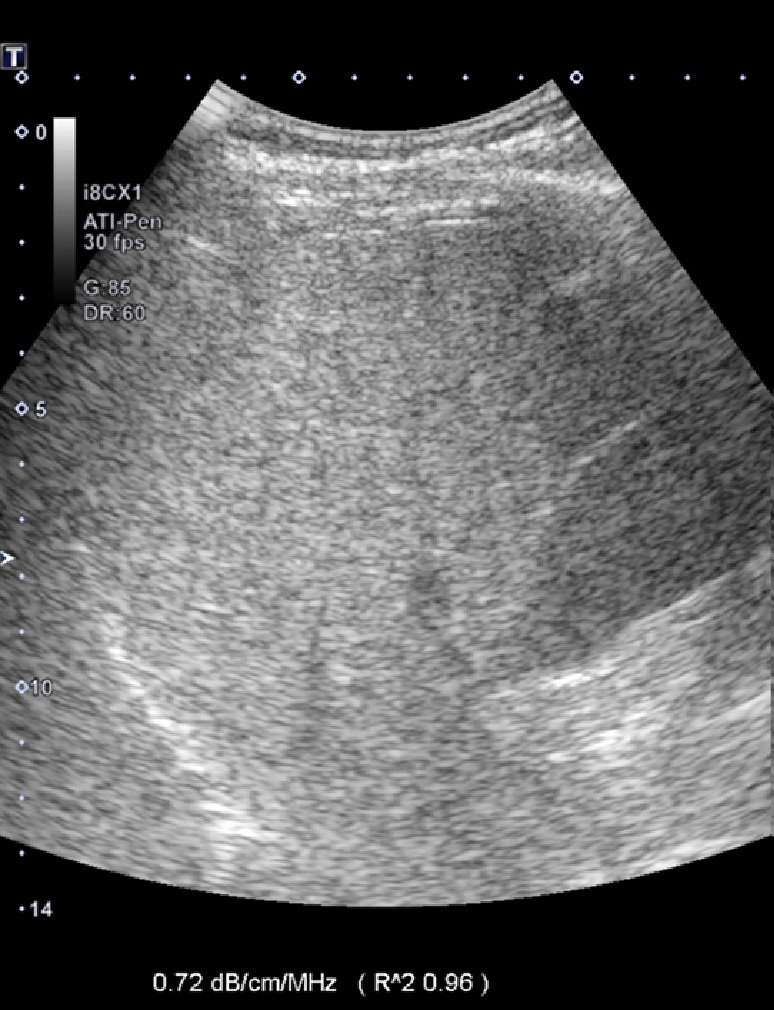

ภาพตัวอย่างที่เรานำมาใช้เป็นภาพของผู้ป่วยที่เป็นโรคไขมันพอกตับ ซึ่งสังเกตได้จากพื้นที่ส่วนสีขาวหรือเทาสว่างนั้นมีค่อนข้างมาก ซึ่งเดี๋ยวเราจะมาลองนำภาพนี้มาทำ Enhancement เพื่อให้เห็นลักษณะสภาพของเนื้อตับที่โดนไขมันพอกกันดูค่ะ

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.io import imshow

In [109]:
imag = cv2.imread('grliver.jpg')

ทำเป็นภาพ Gray-level

In [110]:
img = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(imag, cv2.COLOR_RGB2GRAY)

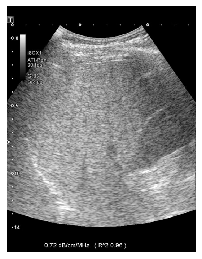

In [111]:
imshow(img)
plt.axis('off')
plt.show()

## Noise reduction using Median Filter

จากภาพต้นฉบับเราจะพบว่ามันมี noise จากการทำอัลตร้าซาวด์เยอะมาก ๆ เราจึงตัดสินใจลด noise โดยการทำ Smoothing (low-pass) filters ที่เป็น Median Filter ซึ่งจะเป็นการนำค่ามัธยฐานของตัวเลขบนภาพ gray level ซึ่งเป็นวิธีการลด noise ที่ค่อนข้างมีประสิทธิภาพและเก็บขอบได้ค่อนข้างดี เหลือเพียงรายละเอียดที่คาดว่าน่าจะสำคัญ

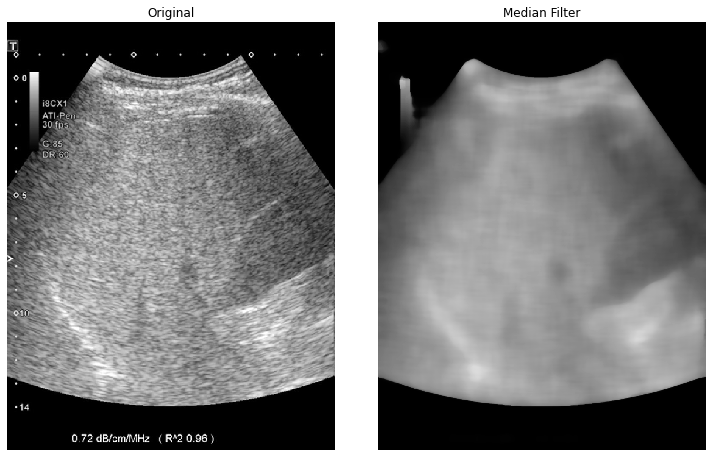

<Figure size 3600x3600 with 0 Axes>

In [112]:
median = cv2.medianBlur(img,41)

plt.figure(figsize=(10,10))
plt.subplot(121),imshow(img),plt.title('Original')
plt.axis('off')
plt.subplot(122),imshow(median),plt.title('Median Filter')
plt.axis('off')
plt.figure(figsize=(50,50))
plt.show()

ภาพด้านบน เหมือนว่าจะยังเห็นจุดด่าง ๆ สีขาวอยู่

หากเปลี่ยนตัวเลขใน median filter ให้สูงขึ้นเรื่อยๆ รายละเอียดบางอย่างจะเริ่มถูกลดทอนลง เราจะเปลี่ยนวิธีมาใช้ median filter สลับกับใช้ GuassianBlur ช่วยในการลดร่องรอยของกรอบเหลี่ยม ๆ ออกไป เพื่อลดการรักษาขอบของวิธีการ median filter ลง

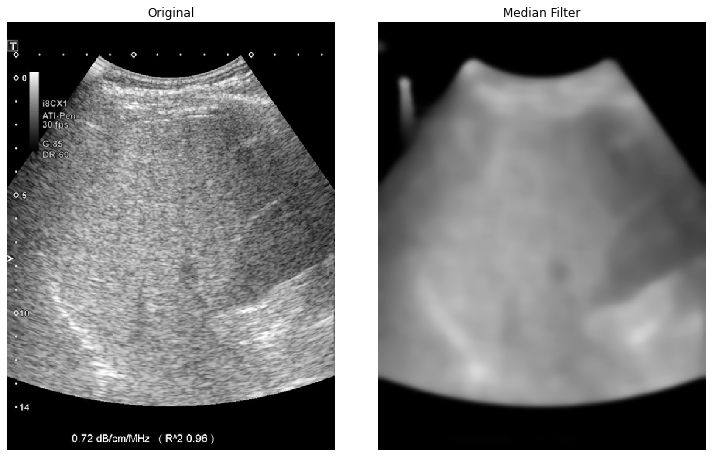

In [113]:
#kernel = np.ones((7,7),np.float32)/49
#dst = cv2.filter2D(img,-1,kernel)

median = cv2.medianBlur(img,41)
blur = cv2.GaussianBlur(median,(31,31),0)
median2 = cv2.medianBlur(blur,15)

plt.figure(figsize=(10,10))
plt.subplot(121),imshow(img),plt.title('Original')
plt.axis('off')
plt.subplot(122),imshow(median2),plt.title('Median Filter')
plt.axis('off')
plt.show()

เริ่มมองเห็นลักษณะที่เป็นชั้น ๆ ของเนื้อตับแล้ว

## Gray Level Transformations

รวมฟังก์ชันที่เกี่ยวข้องกับ Gray Level Transformations

In [114]:
def GLT(image, transform, coeff = 1.0, gamma = 1.0):
    if transform == 'negative':
        table = np.array([256-1-i for i in np.arange(0,256)]).astype("uint8")
        
    elif transform == 'identity':
        table = np.array([i for i in np.arange(0,256)]).astype("uint8")
        
    elif transform == 'log':
        table = np.array([10*coeff*(np.log10(1+i)) for i in np.arange(0,256)]).astype("uint8")
        
    elif transform == 'invlog':
        table = np.array([10*coeff/(np.log10(1+i)+1) for i in np.arange(0,256)]).astype("uint8")
        
    elif transform == 'root':
        invGamma = 1.0/gamma
        table = np.array([coeff*((i/255.0)**invGamma)*255 for i in np.arange(0,256)]).astype("uint8")
        
    elif transform == 'power':
        table = np.array([coeff*((i/255.0)**gamma)*255 for i in np.arange(0,256)]).astype("uint8")
        
    return cv2.LUT(image, table)

ฟังก์ชันแสดงผล image ใต้ kernel

In [115]:
def show_out(img,img_blur, transform, coeff, gamma):
    out_img = GLT(img_blur, transform, coeff = coeff, gamma = gamma)

    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.imshow(img, 'gray')
    plt.title('Input Image', fontsize=12)
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(out_img, 'gray')
    plt.title('Ouput Image', fontsize=12)
    plt.axis('off')
    plt.show()
    
    return out_img

### Gamma Correction

จากการทำ Blurring Filter แล้วนำภาพมารวมกับ Laplacian mask และ Sobel ข้างต้นทำให้ภาพค่อนข้างสูญเสียความสว่างหรือส่วนที่เป็นสีขาวไปค่อนข้างมาก เราจึงปรับในส่วนของ Gamma เพิ่มความชัดของสีขาวและสีดำขึ้นจนใกล้เคียงกับภาพต้นฉบับ

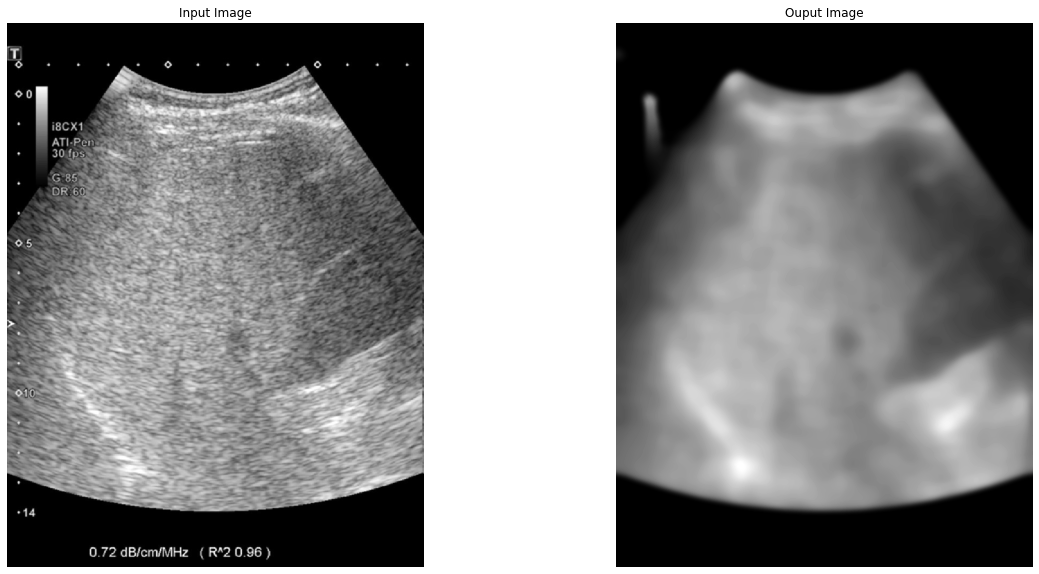

In [116]:
transform = 'power'
coeff = 1
gamma = 1.5

tran_power = show_out(img,median2, transform, coeff = coeff, gamma = gamma)

#### จากภาพ ใช้      $ \gamma = 1.5 $

$$ ขั้นต่อไปมาทำภาพให้ชัดขึ้นกัน $$

## Laplacian Mask

เนื่องจากขนาดภาพที่เราใช้มีขนาดเป็น 8-bit (0-255 หรือ uint8) ดังนั้นค่า depth ของตัว Transform ต้องมีขนาด 8-bit ด้วย 

1. CV_8U - 8-bit unsigned integers ( 0..255 )

2. CV_8S - 8-bit signed integers ( -128..127 )

3. CV_16U - 16-bit unsigned integers ( 0..65535 )

4. CV_16S - 16-bit signed integers ( -32768..32767 )

5. CV_32S - 32-bit signed integers ( -2147483648..2147483647 )

6. CV_32F - 32-bit floating-point numbers ( -FLT_MAX..FLT_MAX, INF, NAN )

7. CV_64F - 64-bit floating-point numbers ( -DBL_MAX..DBL_MAX, INF, NAN )

enum { CV_8U=0, CV_8S=1, CV_16U=2, CV_16S=3, CV_32S=4, CV_32F=5, CV_64F=6 };

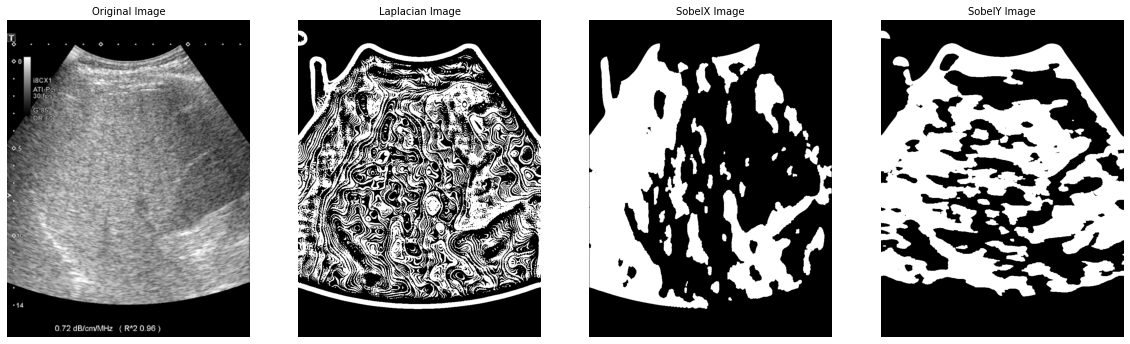

In [168]:
laplacian = cv2.Laplacian(tran_power, ddepth = cv2.CV_8U, ksize = 11, scale = 5)
sobelx = cv2.Sobel(tran_power, cv2.CV_8U, 1,0, ksize = 11)
sobely = cv2.Sobel(tran_power, cv2.CV_8U, 0,1, ksize = 11)

plt.figure(figsize=(20,20))
plt.subplot(141),plt.imshow(img, cmap='gray')
plt.title('Original Image', fontsize = 10), plt.axis('off')


plt.subplot(142),plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Image', fontsize=10)
plt.axis('off')


plt.subplot(143),plt.imshow(sobelx, cmap='gray')
plt.title('SobelX Image', fontsize=10)
plt.axis('off')


plt.subplot(144),plt.imshow(sobely, cmap='gray')
plt.title('SobelY Image', fontsize=10)
plt.axis('off')
plt.show()

เราทำ Laplacian เพื่อที่จะเพิ่มความคมชัดและขอบให้กับภาพ และทำ Sobel เพื่อจำลองเป็นภาพมีขอบ 3 มิติ จากนั้นจะนำทั้ง 2 ภาพนี้มารวมกับภาพเบลอเพื่อให้ได้ผลลัพธ์ที่ต้องการ โดยภาพ sobel ที่เลือกจะเป็นของ SobleX (Sobel ที่มีทิศทางตามแนวแกน x) เพราะมีลักษณะนูน เหมาะจะใช้จำลองเป็นภาพการพอกของไขมันในตับได้ดี

## Unsharp Masking

กระบวนการที่ทำให้ภาพคมชัดขึ้น ตามทฤษฎีก็คือ นำภาพที่ต้องการมาจับลบกับภาพที่ทำการประมวลผลแล้ว ก็จะได้ภาพที่ต้องการออกมา

## $$f_{expect}(x,y) = f_{blur}(x,y) - \overline{f}_{laplace}(x,y) - \overline{f}_{sobelX}(x,y) $$

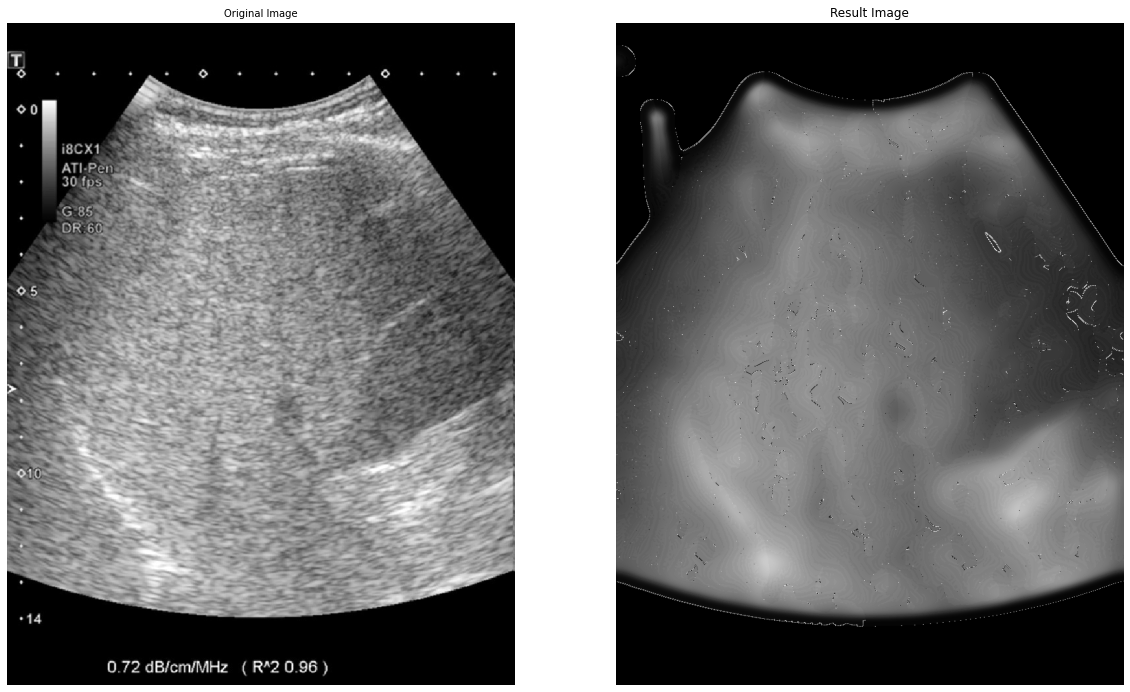

In [173]:
result = tran_power - 5*laplacian - 5*sobelx #ใส่ Scale = 5 ให้แต่ละภาพ (ใช้เลข 5 เพราะผลลัพธ์สวยสุด)

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original Image', fontsize = 10), plt.axis('off')

plt.subplot(122),plt.imshow(abs(result), cmap='gray')
plt.title('Result Image'), plt.axis('off')
plt.show()

เราก็จะได้ภาพนูนจำลองลักษณะพื้นผิวตับที่ดูง่ายขึ้นว่าภาพถ่ายอัลตร้าซาวด์ที่ตับของคนไข้รายนี้พบว่า ตับของคนไข้นั้นถูกไขมันพอกอยู่ได้!